### Find SS

In [2]:
import numpy as np
from scipy.optimize import root
from matplotlib import pyplot as plt
import time

b = .96
d = 0.06
a = .36
SStol = 1.E-10
lbar = .90
pi_11 = .9 
pi_12 = 1 - pi_11
pi_21 = (lbar - (lbar * pi_11))/(1-lbar)
pi_22 = ((1-lbar) - (lbar * pi_12))/(1-lbar)
PI = np.array([[pi_11, pi_12], [pi_21, pi_22]])
print(PI)


[[0.9 0.1]
 [0.9 0.1]]


In [45]:
params = (b, a, d, PI)
def funcfact(params):
    b, a, d, Pi = params 
    def utility(c):
        '''
        utility function
        Inputs:
            consumption
        Outputs
        '''
        if (c <= 0):
            return -9999999
        else:
            u = log(c)
            return u
    def du(c):
        '''
        utility function
        Inputs:
            consumption
        Outputs
        '''
        if (c <= 0): return -99999999
        else:
            return (1/c)
    
    def compute_r(k, u):
        r = a*(k**(a-1))*(1-u)**(1-a)
        return r
        
    def compute_w(k, u):
        w = (1-a)*(k**(a))*(1-u)**(-a) 
        return w
    
    def objective(k, k1, v, eps):
        '''
        Objective Function Value
        Given a specific k_index which will refer to a 
        '''
        val = np.zeros_like(k1)
        r = comp_r(k, 1-lbar)
        w = comp_w(k, 1-lbar)
        c = w*eps + r*k + (1-d)*k - k1
        val[c <= 0] = -999999
        val[c > 0] = np.log(c[c > 0]) + \
            b*(Pi[1-eps][0] * v[c > 0][0][0] + Pi[1-eps][1]*v[c > 0][0][1])
        return val
    
    
    return utility, du, compute_r, compute_w, objective 


        
u, du, comp_r, comp_w, objective = funcfact(params)

k_bar = ((a*b)/(1-b*(1-d)))**(1/(1-a))
r_bar = comp_r(k_bar, 1-lbar)
w_bar = comp_w(k_bar, 1-lbar)
print("K_ss", k_bar)
print("r_ss", r_bar)
print("w_ss", w_bar)


K_ss 7.211176392599507
r_ss 0.09503723459520197
w_ss 1.3537387901844178


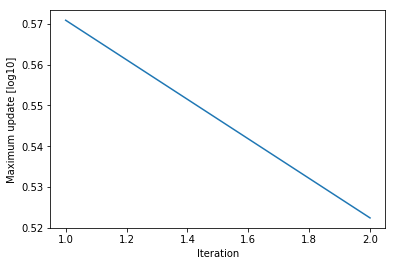

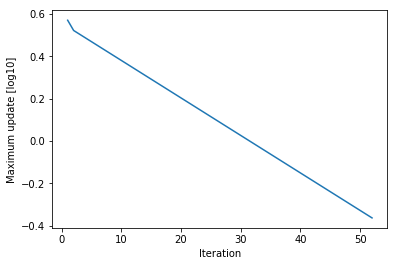

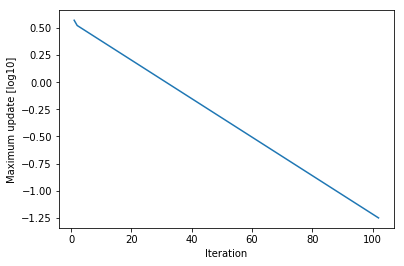

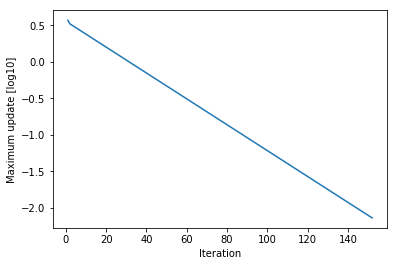

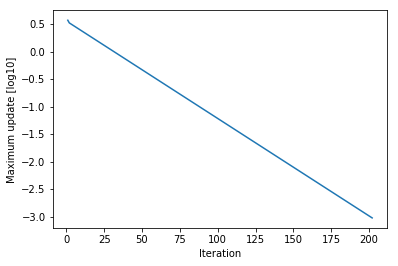

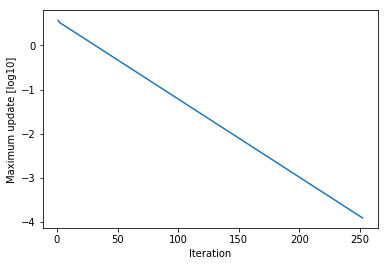

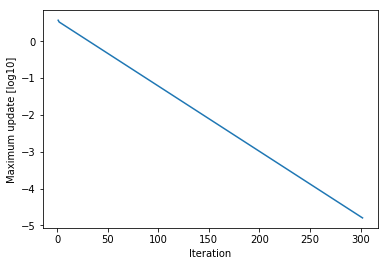

Converged after iteration 314


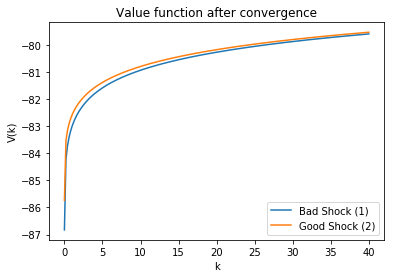

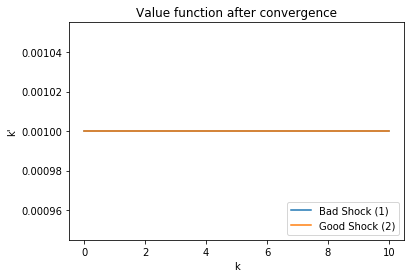

In [46]:
def smith(max_iterations, tol, Pi, kbar):
    k_grid = np.linspace(.001, 40, 200)           # Array of Admissable capital levels 
    eps_grid = [0, 1]
    ## Upper Case V denotes the average of the two states, lower case v denotes state specific value
    V = np.zeros_like(k_grid)                     # (1, grid_size) dim vector of the value functions 
    v = np.zeros([len(k_grid), len(eps_grid)])      # (2, grid_size) array of the value functions by state
    diff_list = []                                # diff_list
    pol = np.zeros_like(v)                        # (2, grid_size) array of policy functions by state 
    plot_int = 50                                 # Plotting Frequency
    for itera in range(max_iterations):
        V_new = np.zeros_like(V)
        v_new = np.zeros_like(v)
        for i, k in enumerate(k_grid):
            for j, eps in enumerate(eps_grid):
                val = objective(k, k_grid, v, eps)
                v_new[i, j] = np.amax(val)
                pol[i, j] = k_grid[np.argmax(val)]
            V_new[i] = np.dot(v_new[i,:], Pi[0,:])


        diff = np.amax(abs(v_new - v))
        diff_list.append(diff)
        V = np.copy(V_new)
        v = np.copy(v_new)

        if (diff < tol):
            print('Converged after iteration {}'.format(itera +1))
            plt.figure()
            plt.plot(k_grid, v[:, 0], label = "Bad Shock (1)")
            plt.plot(k_grid, v[:, 1], label = "Good Shock (2)")
            plt.legend(loc="lower right")
            plt.xlabel('k')
            plt.ylabel('V(k)')
            plt.title('Value function after convergence')
            plt.show();


            plt.figure()
            plt.plot(np.linspace(.001, 10, 200), pol[:,0], label = "Bad Shock (1)")
            plt.plot(np.linspace(.001, 10, 200), pol[:,1], label = "Good Shock (2)")
            plt.legend(loc="lower right")
            plt.xlabel('k')
            plt.ylabel('k\'')
            plt.title('Value function after convergence')
            plt.show();
            break

        elif (itera % plot_int == 1 ):
            plt.figure()
            plt.plot(np.arange(1, itera+2), np.log10(np.array(diff_list)))
            plt.xlabel('Iteration')
            plt.ylabel('Maximum update [log10]')
            plt.show();

smith(500, 1.E-5, PI, k_bar)